In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import warnings
warnings.filterwarnings("ignore")   

---
### Произведем объединение первичных данных

In [2]:
# Загрузка данных
def load_data():
    customers = pd.read_csv("./clean_data/customers.csv")
    geolocation = pd.read_csv("./clean_data/geolocation.csv")
    order_pay = pd.read_csv("./clean_data/order_payments.csv")
    reviews = pd.read_csv("./clean_data/order_reviews.csv")
    orders = pd.read_csv("./clean_data/orders.csv")
    item = pd.read_csv("./clean_data/orders_items.csv")
    category_name = pd.read_csv(
        "./clean_data/product_category_name_translation.csv")
    products = pd.read_csv("./clean_data/products.csv")
    sellers = pd.read_csv("./clean_data/sellers.csv")
    return customers, geolocation, order_pay, reviews, orders, item, category_name, products, sellers


In [3]:
# Объединение данных
def merge_data(orders, item, order_pay, reviews, products, customers, sellers, category_name):
    df = orders.merge(item, on='order_id', how='left')
    df = df.merge(order_pay, on='order_id', how='outer', validate='m:m')
    df = df.merge(reviews, on='order_id', how='outer')
    df = df.merge(products, on='product_id', how='outer')
    df = df.merge(customers, on='customer_id', how='outer')
    df = df.merge(sellers, on='seller_id', how='outer')
    df = df.merge(category_name, on="product_category_name", how="left")
    return df

In [4]:
# Очистка данных: удаление строк без customer_unique_id
def filter_customers(df):
    return df[~df["customer_unique_id"].isna()]

In [5]:
# Главная функция пайплайна
def main_pipeline():
    # Шаг 1: Загрузка данных
    customers, geolocation, order_pay, reviews, orders, item, category_name, products, sellers = load_data()

    # Шаг 2: Объединение данных
    df = merge_data(orders, item, order_pay, reviews, products,
                    customers, sellers, category_name)

    # Шаг 3: Фильтрация данных
    df = filter_customers(df)

    final_data = df

    return final_data

In [6]:
data = main_pipeline()

In [7]:
data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,d455a8cb295653b55abda06d434ab492,944b72539d7e1f7f7fc6e46639ef1fe3,delivered,2017-09-26 22:17:05,2017-09-27 22:24:16,2017-09-29 15:53:03,2017-10-07 16:12:47,2017-10-30 00:00:00,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,...,43.0,36.0,3c7e305796add66698959fc7ad176f6b,87502.0,umuarama,PR,9080.0,santo andre,SP,small_appliances
1,7f39ba4c9052be115350065d07583cac,d7fc82cbeafea77bd0a8fbbf6296e387,delivered,2017-10-18 08:16:34,2017-10-18 23:56:20,2017-10-20 14:29:01,2017-10-27 16:46:05,2017-11-09 00:00:00,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,...,43.0,36.0,9de5797cddb92598755a0f76383ddbbb,35490.0,entre rios de minas,MG,9080.0,santo andre,SP,small_appliances
2,9dc8d1a6f16f1b89874c29c9d8d30447,d9442164acf4b03109425633efaa0cfc,delivered,2017-10-12 13:33:22,2017-10-12 13:49:22,2017-10-17 15:42:42,2017-10-24 20:17:44,2017-11-06 00:00:00,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,...,43.0,36.0,9915eb9f74b6c11aaf04833f65b00e93,38600.0,paracatu,MG,9080.0,santo andre,SP,small_appliances
3,0f548bd29148ebc519d6495e37a284e1,015faf9ec36eccd957c0f2782aab09a4,delivered,2017-09-03 08:06:30,2017-09-03 08:25:50,2017-09-04 22:03:06,2017-09-08 16:26:55,2017-09-27 00:00:00,1.0,08574b074924071f4e201e151b152b4e,...,12.0,39.0,dce323533e45e74d215e0fe7fb114118,24710.0,sao goncalo,RJ,29156.0,cariacica,ES,garden_tools
4,0f548bd29148ebc519d6495e37a284e1,015faf9ec36eccd957c0f2782aab09a4,delivered,2017-09-03 08:06:30,2017-09-03 08:25:50,2017-09-04 22:03:06,2017-09-08 16:26:55,2017-09-27 00:00:00,2.0,08574b074924071f4e201e151b152b4e,...,12.0,39.0,dce323533e45e74d215e0fe7fb114118,24710.0,sao goncalo,RJ,29156.0,cariacica,ES,garden_tools
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118806,NaN,ffaded93e5a1fce06363cfb6905676a1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,587b326ba3bf8aa4d3e50fb1f38ea79f,6722.0,cotia,SP,NaN,NaN,NaN,NaN
118807,NaN,ffb81db92e7ac00ecfac978f673be8a6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,14d46ad43ae7e3cd6944258b9840373b,49509.0,itabaiana,SE,NaN,NaN,NaN,NaN
118808,NaN,ffe7ffb7c7ae0d42808f387578426b3b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1942b890cee1b55dbf8176e925e79e07,90690.0,porto alegre,RS,NaN,NaN,NaN,NaN
118809,NaN,fffc22669ca576ae3f654ea64c8f36be,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0f21adf44f13a61282678a89f6433c10,40255.0,salvador,BA,NaN,NaN,NaN,NaN


In [8]:
data.dropna(inplace=True)

In [9]:
data["order_delivered_customer_date"] = pd.to_datetime(data["order_delivered_customer_date"])

In [10]:
data_test = data[data["order_delivered_customer_date"] >= pd.to_datetime("2018-07-01")]
data_train = data[data["order_delivered_customer_date"] < pd.to_datetime("2018-07-01")]

In [11]:
labels = pd.read_csv("./labels/rfm.csv")
labels.head()

,customer_unique_id,R_rank,F_rank,M_rank,RFM_Weighted,Churn_Risk
0,0000366f3b9a7992bf8c76cfdf3221e2,4,1,1,2.5,2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3,1,1,2.0,2
2,0000f46a3911fa3c0805444483337064,1,1,1,1.0,3
3,0000f6ccb0745a6a4b88665a16c9f078,2,1,1,1.5,3
4,0004aac84e0df4da2b147fca70cf8255,2,1,1,1.5,3


In [12]:
labels = labels[["customer_unique_id", "Churn_Risk"]]
labels.head()

,customer_unique_id,Churn_Risk
0,0000366f3b9a7992bf8c76cfdf3221e2,2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2
2,0000f46a3911fa3c0805444483337064,3
3,0000f6ccb0745a6a4b88665a16c9f078,3
4,0004aac84e0df4da2b147fca70cf8255,3


---
### Сформируем портрет клиента на основе подхода который мы использовали для KMeans, но с учетом тех фитов которые мы можем поймать даже при первой покупке клиента, т.е. группа товаров, город, цена товара, оценка товара, что-то, что позволит нам идентифицировать клиента гораздо заранее с определенной долей вероятности

In [13]:
# Сформируем информацию по количеству покупок
orderer_by_client_train = data_train.groupby(["customer_unique_id",])[
    ["order_id"]].count().reset_index().rename(columns={"order_id":"num_orders"})

orderer_by_client_train

,customer_unique_id,num_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
77864,fffcf5a5ff07b0908bd4e2dbc735a684,2
77865,fffea47cd6d3cc0a88bd621562a9d061,1
77866,ffff371b4d645b6ecea244b27531430a,1
77867,ffff5962728ec6157033ef9805bacc48,1


In [14]:
# Сформируем информацию по количеству покупок
orderer_by_client_test = data_test.groupby(["customer_unique_id",])[
    ["order_id"]].count().reset_index().rename(columns={"order_id":"num_orders"})

orderer_by_client_test

,customer_unique_id,num_orders
0,000e309254ab1fc5ba99dd469d36bdb4,2
1,000ec5bff359e1c0ad76a81a45cb598f,1
2,000fbf0473c10fc1ab6f8d2d286ce20c,4
3,0015752e079902b12cd00b9b7596276b,2
4,00172711b30d52eea8b313a7f2cced02,1
...,...,...
13896,ffec490ab531184a483efe2eedd68908,1
13897,ffee94d548cef05b146d825a7648dab4,1
13898,fff3e1d7bc75f11dc7670619b2e61840,1
13899,fff5eb4918b2bf4b2da476788d42051c,6


In [15]:
clients_city_train = data_train[["customer_unique_id", "customer_city"]]
clients_city_train = clients_city_train.drop_duplicates()
clients_city_train

,customer_unique_id,customer_city
0,3c7e305796add66698959fc7ad176f6b,umuarama
1,9de5797cddb92598755a0f76383ddbbb,entre rios de minas
2,9915eb9f74b6c11aaf04833f65b00e93,paracatu
3,dce323533e45e74d215e0fe7fb114118,sao goncalo
5,acfca8c3549ceceba9e125afc0349610,curitiba
...,...,...
115826,f992b70fb02cdfadc277f493997515b7,porto ferreira
115827,08da95f931937b2c20f5225f2e6c93b0,santo andre
115828,051bc94e9cd865806bba8eeefb336d0a,cesario lange
115829,e03a1bf47d42257f8e8e5e8775696622,embu-guacu


In [16]:
clients_city_test = data_test[["customer_unique_id", "customer_city"]]
clients_city_test = clients_city_test.drop_duplicates()
clients_city_test

,customer_unique_id,customer_city
9,dd47740f3c285d15d8c9c72fc204e78a,belo horizonte
201,bdd6161ef248021de58940666e32ce93,prudentopolis
515,a30df00a22c69239b63f02b32fd233c7,sao paulo
527,268a7f591b53e9d437da6fa851aecd9e,brasilia
683,b1509fcb21da7376ef86182f65298ded,sao paulo
...,...,...
115776,f68bdc0a50d8fbe96e0144beff4bcc0e,curitiba
115777,8c446b198f0c92d5db58d3c8eacd3a11,irati
115786,3cc1026f5863d3b5fc44bd92bad50cee,porto alegre
115810,0c7f5da7d9d33d16ddc25dfafcc513ce,sao paulo


In [17]:
payments_ratings_train = data_train.groupby("customer_unique_id")[
    ["payment_value", "payment_installments", "price", "review_score"]].agg(["mean"]).reset_index()
payments_ratings_train.columns = ['_'.join(col).strip('_') for col in payments_ratings_train.columns.values]
payments_ratings_train

,customer_unique_id,payment_value_mean,payment_installments_mean,price_mean,review_score_mean
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,8.0,129.90,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,1.0,18.90,4.0
2,0000f46a3911fa3c0805444483337064,86.22,8.0,69.00,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,4.0,25.99,4.0
4,0004aac84e0df4da2b147fca70cf8255,196.89,6.0,180.00,5.0
...,...,...,...,...,...
77864,fffcf5a5ff07b0908bd4e2dbc735a684,2067.42,10.0,785.00,5.0
77865,fffea47cd6d3cc0a88bd621562a9d061,84.58,1.0,64.89,4.0
77866,ffff371b4d645b6ecea244b27531430a,112.46,1.0,89.90,5.0
77867,ffff5962728ec6157033ef9805bacc48,133.69,5.0,115.00,5.0


In [18]:
payments_ratings_test = data_test.groupby("customer_unique_id")[
    ["payment_value", "payment_installments", "price", "review_score"]].agg(["mean"]).reset_index()
payments_ratings_test.columns = ['_'.join(col).strip('_') for col in payments_ratings_test.columns.values]
payments_ratings_test

,customer_unique_id,payment_value_mean,payment_installments_mean,price_mean,review_score_mean
0,000e309254ab1fc5ba99dd469d36bdb4,39.21,1.0,59.90,3.0
1,000ec5bff359e1c0ad76a81a45cb598f,27.75,1.0,14.96,5.0
2,000fbf0473c10fc1ab6f8d2d286ce20c,362.38,1.0,71.45,5.0
3,0015752e079902b12cd00b9b7596276b,74.82,3.0,29.90,5.0
4,00172711b30d52eea8b313a7f2cced02,122.07,2.0,74.50,4.0
...,...,...,...,...,...
13896,ffec490ab531184a483efe2eedd68908,57.98,1.0,39.90,1.0
13897,ffee94d548cef05b146d825a7648dab4,35.36,1.0,27.90,5.0
13898,fff3e1d7bc75f11dc7670619b2e61840,82.51,1.0,54.85,5.0
13899,fff5eb4918b2bf4b2da476788d42051c,2844.96,1.0,175.00,5.0


In [19]:
# Сформируем информацию по модальной категории продуктов в разрезе пользователей
def calculate_mode(series):
    return series.mode().iloc[0] if not series.mode().empty else None

mode_category_train = (
    data_train.groupby("customer_unique_id")["product_category_name_english"]
    .agg(calculate_mode)
    .reset_index()
)

mode_category_train.columns = ["customer_unique_id", "most_frequent_product_category"]

mode_category_train


,customer_unique_id,most_frequent_product_category
0,0000366f3b9a7992bf8c76cfdf3221e2,bed_bath_table
1,0000b849f77a49e4a4ce2b2a4ca5be3f,health_beauty
2,0000f46a3911fa3c0805444483337064,stationery
3,0000f6ccb0745a6a4b88665a16c9f078,telephony
4,0004aac84e0df4da2b147fca70cf8255,telephony
...,...,...
77864,fffcf5a5ff07b0908bd4e2dbc735a684,health_beauty
77865,fffea47cd6d3cc0a88bd621562a9d061,baby
77866,ffff371b4d645b6ecea244b27531430a,auto
77867,ffff5962728ec6157033ef9805bacc48,watches_gifts


In [20]:
mode_category_test = (
    data_test.groupby("customer_unique_id")["product_category_name_english"]
    .agg(calculate_mode)
    .reset_index()
)

mode_category_test.columns = ["customer_unique_id", "most_frequent_product_category"]

mode_category_test

,customer_unique_id,most_frequent_product_category
0,000e309254ab1fc5ba99dd469d36bdb4,fashion_underwear_beach
1,000ec5bff359e1c0ad76a81a45cb598f,home_appliances
2,000fbf0473c10fc1ab6f8d2d286ce20c,musical_instruments
3,0015752e079902b12cd00b9b7596276b,luggage_accessories
4,00172711b30d52eea8b313a7f2cced02,stationery
...,...,...
13896,ffec490ab531184a483efe2eedd68908,construction_tools_construction
13897,ffee94d548cef05b146d825a7648dab4,auto
13898,fff3e1d7bc75f11dc7670619b2e61840,computers_accessories
13899,fff5eb4918b2bf4b2da476788d42051c,signaling_and_security


In [21]:
clients_data_1_train = orderer_by_client_train.merge(
    payments_ratings_train, on="customer_unique_id")
clients_data_2_train = clients_city_train.merge(mode_category_train, on="customer_unique_id")
clients_data = clients_data_1_train.merge(
    clients_data_2_train, on="customer_unique_id")

# ОбЪединяем с лейблами
clients_data_labeled_train = labels.merge(clients_data, on="customer_unique_id")
clients_data_labeled_train

,customer_unique_id,Churn_Risk,num_orders,payment_value_mean,payment_installments_mean,price_mean,review_score_mean,customer_city,most_frequent_product_category
0,0000366f3b9a7992bf8c76cfdf3221e2,2,1,141.90,8.0,129.90,5.0,cajamar,bed_bath_table
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2,1,27.19,1.0,18.90,4.0,osasco,health_beauty
2,0000f46a3911fa3c0805444483337064,3,1,86.22,8.0,69.00,3.0,sao jose,stationery
3,0000f6ccb0745a6a4b88665a16c9f078,3,1,43.62,4.0,25.99,4.0,belem,telephony
4,0004aac84e0df4da2b147fca70cf8255,3,1,196.89,6.0,180.00,5.0,sorocaba,telephony
...,...,...,...,...,...,...,...,...,...
77953,fffcf5a5ff07b0908bd4e2dbc735a684,2,2,2067.42,10.0,785.00,5.0,sanharo,health_beauty
77954,fffea47cd6d3cc0a88bd621562a9d061,3,1,84.58,1.0,64.89,4.0,feira de santana,baby
77955,ffff371b4d645b6ecea244b27531430a,3,1,112.46,1.0,89.90,5.0,sinop,auto
77956,ffff5962728ec6157033ef9805bacc48,2,1,133.69,5.0,115.00,5.0,bom jesus do norte,watches_gifts


In [22]:
clients_data_1_test = orderer_by_client_test.merge(
    payments_ratings_test, on="customer_unique_id")
clients_data_2_test = clients_city_test.merge(mode_category_test, on="customer_unique_id")
clients_data = clients_data_1_test.merge(
    clients_data_2_test, on="customer_unique_id")

# ОбЪединяем с лейблами
clients_data_labeled_test = labels.merge(clients_data, on="customer_unique_id")
clients_data_labeled_test.head()

,customer_unique_id,Churn_Risk,num_orders,payment_value_mean,payment_installments_mean,price_mean,review_score_mean,customer_city,most_frequent_product_category
0,000e309254ab1fc5ba99dd469d36bdb4,1,2,39.21,1.0,59.90,3.0,valparaiso de goias,fashion_underwear_beach
1,000ec5bff359e1c0ad76a81a45cb598f,2,1,27.75,1.0,14.96,5.0,salto de pirapora,home_appliances
2,000fbf0473c10fc1ab6f8d2d286ce20c,1,4,362.38,1.0,71.45,5.0,indaiatuba,musical_instruments
3,0015752e079902b12cd00b9b7596276b,1,2,74.82,3.0,29.90,5.0,sao paulo,luggage_accessories
4,00172711b30d52eea8b313a7f2cced02,2,1,122.07,2.0,74.50,4.0,jequie,stationery


In [23]:
# # Кодируем и центрируем что нужно
# label_encoder_city = LabelEncoder()
# label_encoder_cat = LabelEncoder()
# scaler = StandardScaler()

# num_columns = ["num_orders", "payment_value_mean", "payment_installments_mean",
#                "price_mean", "review_score_mean"]
# cat_columns = ["customer_city", "most_frequent_product_category"]


# # Разделение на X и y
# X = clients_data_labeled[num_columns + cat_columns]
# y = clients_data_labeled["labels_final"]

# X_scaled = scaler.fit_transform(X[num_columns])
# X_city = label_encoder_city.fit_transform(X["customer_city"])
# X_category = label_encoder_cat.fit_transform(
#     X["most_frequent_product_category"])

# X_joined = pd.concat([pd.DataFrame(X_scaled, columns=num_columns), pd.DataFrame(
#     X_city, columns=["customer_city"]), pd.DataFrame(X_category, columns=["most_frequent_product_category"])], axis=1)
# X_joined

In [25]:
# Кодируем и центрируем что нужно
label_encoder_city = LabelEncoder()
label_encoder_cat = OneHotEncoder()
scaler = StandardScaler()

num_columns = ["num_orders", "payment_value_mean", "payment_installments_mean",
               "price_mean", "review_score_mean"]
cat_columns = ["customer_city", "most_frequent_product_category"]

# Разделение на X и y
X_train = clients_data_labeled_train[num_columns + cat_columns]
y_train = clients_data_labeled_train["Churn_Risk"]

X_test = clients_data_labeled_test[num_columns + cat_columns]
y_test = clients_data_labeled_test["Churn_Risk"]

X_scaled_train = scaler.fit_transform(X_train[num_columns])
X_scaled_test = scaler.transform(X_test[num_columns])

frequency_city = X_train['customer_city'].value_counts()
frequency_category = X_train["most_frequent_product_category"].value_counts()

X_train["customer_city"] = X_train["customer_city"].map(frequency_city)
X_train["most_frequent_product_category"] = X_train["most_frequent_product_category"].map(
    frequency_category)

X_test["customer_city"] = X_test["customer_city"].map(frequency_city)
X_test["most_frequent_product_category"] = X_test["most_frequent_product_category"].map(
    frequency_category)


X_scaled_train = pd.DataFrame(X_scaled_train)
X_scaled_train = pd.concat([X_scaled_train, X_train[[
                           "customer_city", "most_frequent_product_category",]]], axis=1)


X_scaled_test = pd.DataFrame(X_scaled_test)
X_scaled_test = pd.concat([X_scaled_test, X_test[[
                           "customer_city", "most_frequent_product_category",]]], axis=1)


new_column_names = {
    0: 'order_count',
    1: 'mean_payment_value',
    2: 'mean_payment_installments',
    3: 'mean_price',
    4: 'mean_review_score',
    'customer_city': 'city_frequency',
    'most_frequent_product_category': 'category_frequency'
}

# Переименовываем колонки
X_scaled_train.rename(columns=new_column_names, inplace=True)
X_scaled_test.rename(columns=new_column_names, inplace=True)

X_scaled_train

,order_count,mean_payment_value,mean_payment_installments,mean_price,mean_review_score,city_frequency,category_frequency
0,-0.282026,-0.071567,1.879064,0.023481,0.672147,79,7644
1,-0.282026,-0.606309,-0.714075,-0.568140,-0.100222,571,6702
2,-0.282026,-0.331130,1.879064,-0.301111,-0.872590,138,1832
3,-0.282026,-0.529718,0.397270,-0.530351,-0.100222,345,3458
4,-0.282026,0.184779,1.138167,0.290511,0.672147,490,3458
...,...,...,...,...,...,...,...
77953,0.870231,8.904601,2.619961,3.515115,0.672147,3,6702
77954,-0.282026,-0.338775,-0.714075,-0.323017,-0.100222,143,2279
77955,-0.282026,-0.208807,-0.714075,-0.189716,0.672147,32,2989
77956,-0.282026,-0.109840,0.767718,-0.055934,0.672147,4,4248


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(
#     X_joined, y, test_size=0.2, stratify=y, random_state=42)

In [26]:
X_train, X_test, y_train, y_test = X_scaled_train, X_scaled_test, y_train, y_test

---
### Пробуем лес как базу

In [27]:
rf_classif = RandomForestClassifier(n_jobs=-1, random_state=42)
rf_classif.fit(X_train, y_train)

y_pred = rf_classif.predict(X_test)
y_test_pred = rf_classif.predict(X_train)

In [28]:
accuracy_score(y_test, y_pred)

0.46727089627391744

In [29]:
accuracy_score(y_train, y_test_pred)

0.9964211498499191

> Лес переобучился

---
### Пробуем xgboost

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(
#     X_joined, y, test_size=0.2, stratify=y, random_state=42)

In [30]:
# Импортируем необходимые библиотеки
import xgboost as xgb
from sklearn.metrics import accuracy_score


# Преобразуем данные в формат DMatrix, который используется в XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Параметры модели
params = {
    'objective': 'multi:softmax',  # Целевая функция для многоклассовой классификации
    'num_class': 3,               # Количество классов
    'max_depth': 3,               # Максимальная глубина деревьев
    'eta': 0.01,                   # Скорость обучения (learning rate)
    'subsample': 0.7,             # Доля выборки, используемая для обучения каждого дерева
    'colsample_bytree': 0.5      # Доля признаков, используемых для обучения каждого дерева
}

# Обучение модели
num_rounds = 1000  # Количество итераций (деревьев)
model = xgb.train(params, dtrain, num_rounds)

# Предсказание на тестовых данных
y_pred = model.predict(dtest)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

XGBoostError: [10:09:02] /Users/runner/work/xgboost/xgboost/src/objective/multiclass_obj.cu:111: SoftmaxMultiClassObj: label must be in [0, num_class).
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000000323338428 dmlc::LogMessageFatal::~LogMessageFatal() + 124
  [bt] (1) 2   libxgboost.dylib                    0x00000003235ab548 xgboost::obj::SoftmaxMultiClassObj::GetGradient(xgboost::HostDeviceVector<float> const&, xgboost::MetaInfo const&, int, xgboost::linalg::Tensor<xgboost::detail::GradientPairInternal<float>, 2>*) + 684
  [bt] (2) 3   libxgboost.dylib                    0x00000003235239a8 xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 652
  [bt] (3) 4   libxgboost.dylib                    0x000000032335ab34 XGBoosterUpdateOneIter + 144
  [bt] (4) 5   libffi.8.dylib                      0x0000000107e1804c ffi_call_SYSV + 76
  [bt] (5) 6   libffi.8.dylib                      0x0000000107e15834 ffi_call_int + 1404
  [bt] (6) 7   _ctypes.cpython-311-darwin.so       0x0000000107970134 _ctypes_callproc + 752
  [bt] (7) 8   _ctypes.cpython-311-darwin.so       0x000000010796a48c PyCFuncPtr_call + 228
  [bt] (8) 9   python3.11                          0x00000001049a59f0 _PyEval_EvalFrameDefault + 192220



---

In [31]:
# X_train, X_test, y_train, y_test = train_test_split(
#     X_joined, y, test_size=0.2, stratify=y, random_state=42)

In [34]:
y_weights = y_train.value_counts().to_dict()

In [35]:
y_weights

{3: 38418, 2: 33481, 1: 6059}

Epoch [29/50], Loss: 0.0452
Epoch [30/50], Loss: 0.0407
Epoch [31/50], Loss: 0.0336
Epoch [32/50], Loss: 0.0364
Epoch [33/50], Loss: 0.0340
Epoch [34/50], Loss: 0.3106
Epoch [35/50], Loss: 0.0313
Epoch [36/50], Loss: 0.3071
Epoch [37/50], Loss: 0.0340
Epoch [38/50], Loss: 0.1516
Epoch [39/50], Loss: 0.0303
Epoch [40/50], Loss: 0.2245
Epoch [41/50], Loss: 0.0388
Epoch [42/50], Loss: 0.5516
Epoch [43/50], Loss: 0.0374
Epoch [44/50], Loss: 0.0336
Epoch [45/50], Loss: 0.0432
Epoch [46/50], Loss: 0.0388
Epoch [47/50], Loss: 0.2271
Epoch [48/50], Loss: 0.2262
Epoch [49/50], Loss: 0.0336
Epoch [50/50], Loss: 0.0308
Accuracy: 0.8615
Confusion Matrix:
 [[    0  1925     0]
 [    0 11976     0]
 [    0     1     0]]


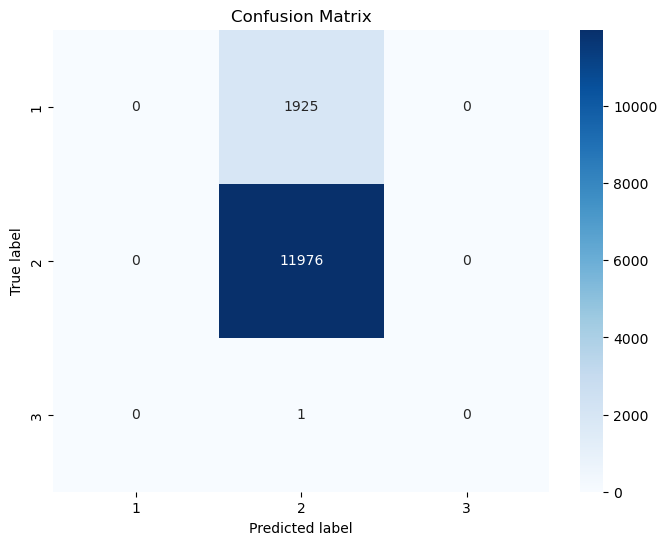

              precision    recall  f1-score   support

     Class 1       0.00      0.00      0.00      1925
     Class 2       0.86      1.00      0.93     11976
     Class 3       0.00      0.00      0.00         1

    accuracy                           0.86     13902
   macro avg       0.29      0.33      0.31     13902
weighted avg       0.74      0.86      0.80     13902



In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Определение архитектуры нейронной сети
class SimpleClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x
        
# 2. Подготовка данных
input_size = X_train.shape[1]  # Размер входных данных
hidden_size = 32  # Увеличили число нейронов
num_classes = 3  # Количество классов для классификации

# Преобразуем данные в тензоры
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values).long()

# Создание Dataset и DataLoader
dataset = TensorDataset(X_train_tensor, y_train_tensor)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# 3. Перевод модели и данных на устройство
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

model = SimpleClassifier(input_size, hidden_size, num_classes).to(device)

# Инициализация функции потерь и оптимизатора
class_counts = [y_weights[3], y_weights[2], y_weights[1]]
total_samples = sum(class_counts)
weights = torch.tensor([total_samples / count for count in class_counts])
weights = weights / weights.sum()
weights = weights.to(device)

loss_fn = nn.CrossEntropyLoss(weight=weights)
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 50
for epoch in range(num_epochs):
    for batch_X, batch_y in dataloader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)

        # Прямой проход
        pred = model(batch_X)
        loss = loss_fn(pred, batch_y)

        # Backward pass и оптимизация
        optimizer.zero_grad()  # Обнуление градиентов
        loss.backward()  # Вычисление градиентов
        optimizer.step()  # Обновление весов

    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

# 4. Оценка на тестовых данных
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)  # Предполагаем, что X_test уже определён
y_test_tensor = torch.tensor(y_test.values).long().to(device)  # Предполагаем, что y_test уже определён

# Переключаем модель в режим оценки
model.eval()

# Отключаем вычисление градиентов во время тестирования
with torch.no_grad():
    # Получаем предсказания
    predictions = model(X_test_tensor)
    _, predicted_classes = torch.max(predictions, 1)

# Рассчитываем точность
accuracy = (predicted_classes == y_test_tensor).float().mean().item()
print(f'Accuracy: {accuracy:.4f}')

# Матрица путаницы и отчет о классификации
conf_matrix = confusion_matrix(y_test_tensor.cpu(), predicted_classes.cpu())
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test_tensor.cpu(), predicted_classes.cpu(), target_names=['Class 1', 'Class 2', 'Class 3']))

In [37]:
print("Предсказанные классы:", predicted_classes.cpu().numpy())

Предсказанные классы: [2 2 2 ... 2 2 2]


In [38]:
print(y_train.value_counts())
print(y_test.value_counts())

Churn_Risk
3    38418
2    33481
1     6059
Name: count, dtype: int64
Churn_Risk
2    11976
1     1925
3        1
Name: count, dtype: int64


In [119]:
# Сохранение модели
torch.save(model.state_dict(), "../services/model_classif.pth")
print("Модель успешно сохранена.")

Модель успешно сохранена.


In [120]:
# Загрузка модели
model = SimpleClassifier(input_size, hidden_size, num_classes).to(device)
model.load_state_dict(torch.load("../services/model_classif.pth"))
print("Модель успешно загружена.")

Модель успешно загружена.


In [40]:
# Подготовка тестовых данных
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)

# Предсказание
model.eval()  # Убедитесь, что модель находится в режиме оценки
with torch.no_grad():  # Отключаем вычисление градиентов
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)  # Получаем индексы максимальных значений (классы)

print("Предсказанные классы:", predicted.cpu().numpy())

Предсказанные классы: [2 2 2 ... 2 2 2]


In [41]:
# Истинные метки
y_test_tensor = torch.tensor(y_test.values).long()

# Оценка точности
accuracy = accuracy_score(y_test_tensor.cpu().numpy(), predicted.cpu().numpy())
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8615


In [138]:
pd.Series(predicted.cpu().numpy()).value_counts()

2    17320
Name: count, dtype: int64